

### 定义问题

通过一组数据来训练模型，从而找到w,b的参数值  
y = wx+b  => y = 2x+1  
w = 2 b = 1


### 数据准备

y = wx+b+e


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
n = 400
x = tf.random.uniform([n,1],minval=-10,maxval=10)
w0 = tf.constant(2.0)
b0 = tf.constant(1.0)
y = x*w0 + b0+tf.random.normal([n,1],mean=0.0,stddev=2.0)


No handles with labels found to put in legend.


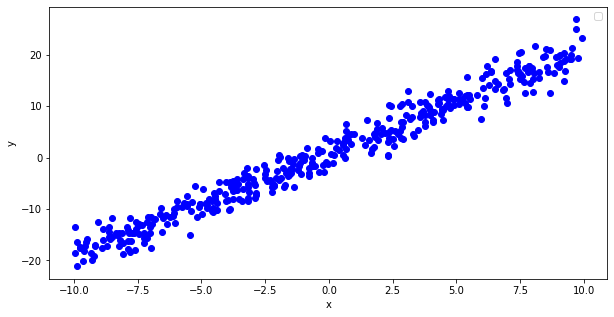

In [3]:
%matplotlib inline

plt.figure(figsize = (10,5))
plt.scatter(x,y,c="b")
plt.xlabel("x")
plt.ylabel("y",rotation=90)
plt.xticks
plt.legend()
plt.show()



### 定义模型

In [4]:
w = tf.Variable(tf.zeros_like(w0))
b = tf.Variable(tf.zeros_like(b0))

def predict(x):
    return x*w+b

def loss_func(y_predict,y_truth):
    return tf.reduce_mean((y_truth-y_predict)**2/2)


### 训练模型


In [5]:
epochs = 100
learning_rate = 0.001
# 构建批量数据处理
batch_size = 10
batch_count = x.shape[0]//batch_size
x_batchs,y_batchs = [],[]
for i in range(batch_count):
    x_batchs.append(x[batch_size*i:batch_size*i+batch_size])
    y_batchs.append(y[batch_size*i:batch_size*i+batch_size])
if x.shape[0]%batch_size != 0:
    x_batchs.append(x[batch_size*batch_count:x.shape[0]])
    y_batchs.append(y[batch_size*batch_count:x.shape[0]])


for epoch in tf.range(1,epochs+1):
    for x_data,y_data in zip(x_batchs,y_batchs):
        # 自动微分
        with tf.GradientTape() as gt:
            # 正向传播，计算预测值
            pred_y = predict(x_data)
            # 计算损失值
            loss = loss_func(pred_y,y_data)
        # 利用自动微分来反向传播计算参数的调整值
        dl_w,dl_b = gt.gradient(loss,[w,b])
        # 更新参数
        w.assign(w-learning_rate*dl_w)
        b.assign(b-learning_rate*dl_b)
    if epoch%10 == 0:
        tf.print("epoch:",epoch,"\tloss:",loss,"\tw:",w,"\tb:",b)

print("finished!!!")




epoch: 10 	loss: 2.51658392 	w: 1.99752843 	b: 0.324700743
epoch: 20 	loss: 2.34201741 	w: 1.99871111 	b: 0.549377918
epoch: 30 	loss: 2.25338626 	w: 1.99949896 	b: 0.699922
epoch: 40 	loss: 2.20672297 	w: 2.00002742 	b: 0.800793588
epoch: 50 	loss: 2.18116784 	w: 2.00038123 	b: 0.868382752
epoch: 60 	loss: 2.16661 	w: 2.00061822 	b: 0.91367
epoch: 70 	loss: 2.15800619 	w: 2.00077701 	b: 0.944015205
epoch: 80 	loss: 2.1527586 	w: 2.0008831 	b: 0.96434778
epoch: 90 	loss: 2.14947438 	w: 2.00095439 	b: 0.977971
epoch: 100 	loss: 2.14737844 	w: 2.00100231 	b: 0.987099528
finished!!!


### 可视化

No handles with labels found to put in legend.


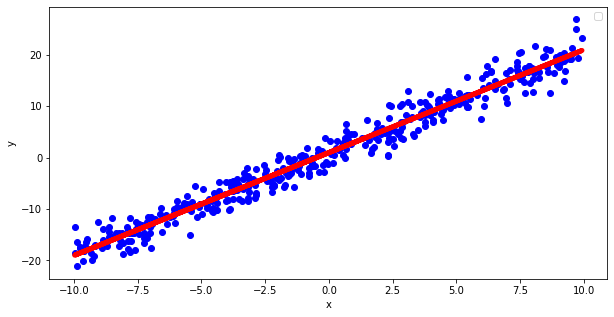

In [10]:
%matplotlib inline

plt.figure(figsize = (10,5))
plt.scatter(x,y,c="b")
plt.plot(x,x*w+b,c='r',linewidth=5)
plt.xlabel("x")
plt.ylabel("y",rotation=90)
plt.xticks
plt.legend()
plt.show()